In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [62]:
data = pd.read_csv("AB_NYC_2019.csv")

In [63]:
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [64]:
data.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [65]:
data.shape

(48895, 16)

### Удаление ненужных признаков

In [66]:
data.drop(columns=['id','name','host_id','host_name','last_review'], axis=1, inplace=True)
data.describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [68]:
data.reviews_per_month.fillna(0, inplace=True)

In [69]:
data = data.dropna()
print(data.shape)

(48895, 11)


### Визуализация базовых статистик

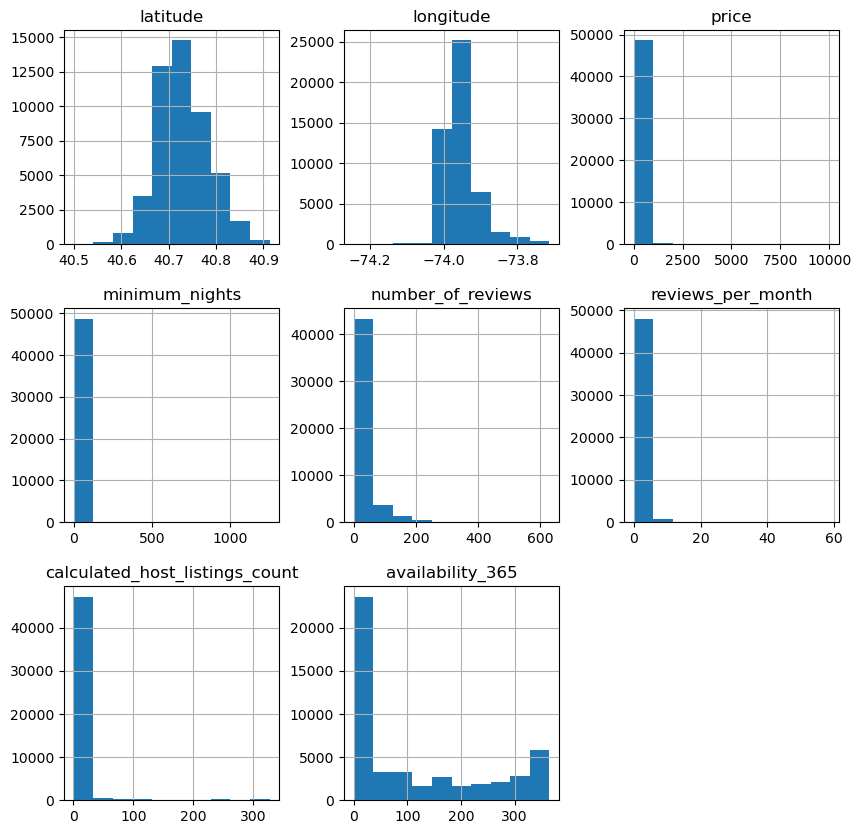

In [70]:
# По простому, но не информативно
data.hist(figsize=(10, 10))
plt.show()

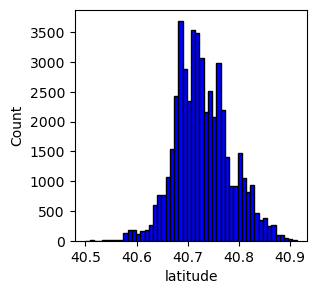

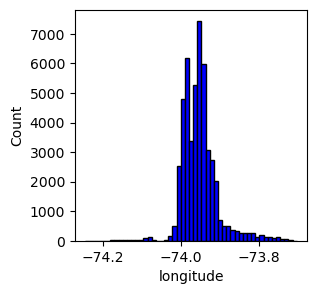

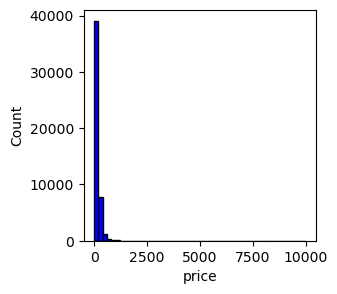

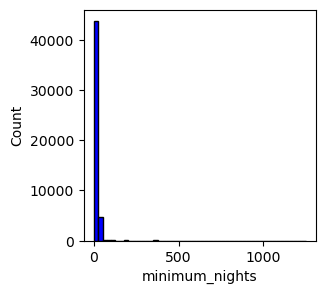

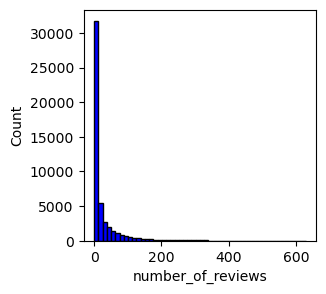

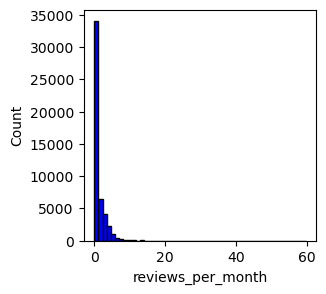

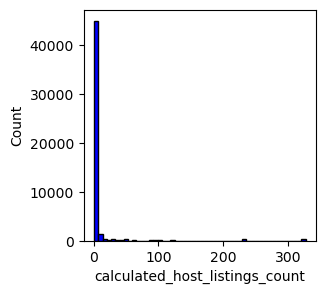

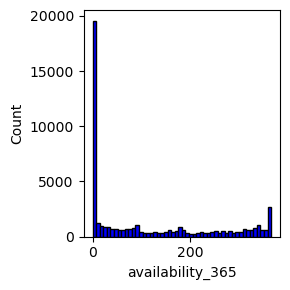

In [71]:
# Более информативно
for col in data.select_dtypes(include=['int64', 'float64']):
    diapazon = data[col].max()-data[col].min()
    binwidth = diapazon*0.02

    fig, ax = plt.subplots(figsize=(3, 3))
                    
    ax.set_xlabel(col, size = 10)
    ax.set_ylabel('Count', size= 10)
    ax.hist(data[col], bins = np.arange(data[col].min(), data[col].max() + binwidth, binwidth),
           color = 'blue', edgecolor = 'black')

plt.tight_layout()
plt.show()

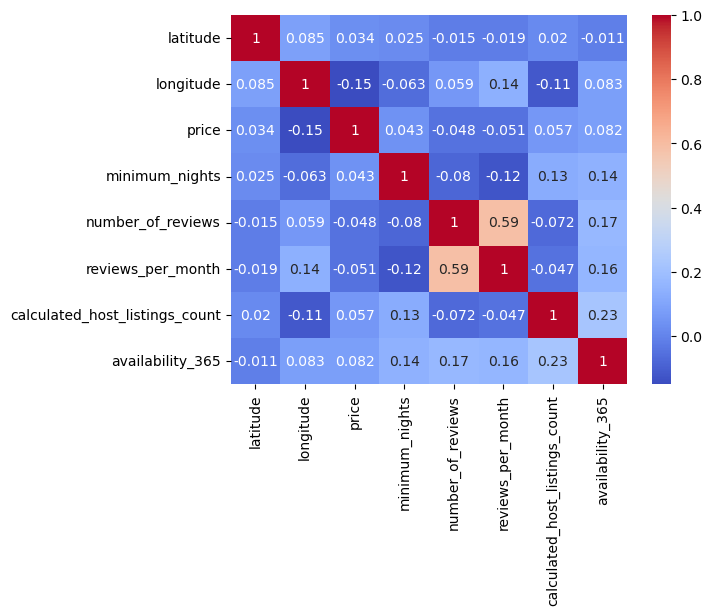

In [72]:
# Матрица попарных корреляций
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

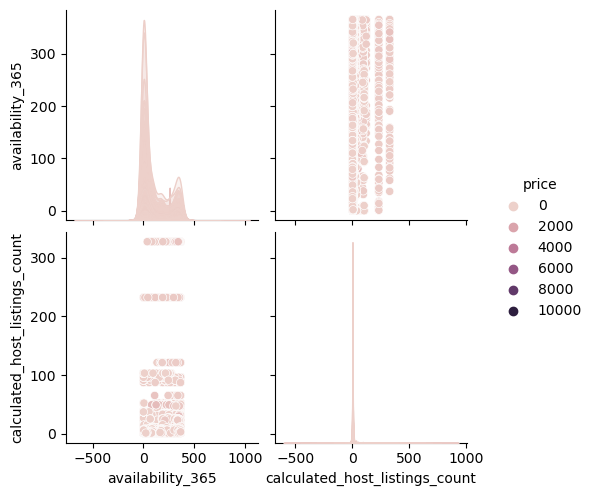

In [73]:
corrmat = data.corr()
cols = corrmat.nlargest(3, 'price')['price'].index.tolist()
cols
sns.pairplot(data=data[cols], hue='price')

In [74]:
data_filter = data['minimum_nights']>50
data.drop(data.loc[data_filter].index, inplace=True)
data_filter = data['number_of_reviews']>100
data.drop(data.loc[data_filter].index, inplace=True)
data_filter = data['calculated_host_listings_count']>20
data.drop(data.loc[data_filter].index, inplace=True)
data_filter = data['reviews_per_month']>6
data.drop(data.loc[data_filter].index, inplace=True)
data_filter = data['price']>750
data.drop(data.loc[data_filter].index, inplace=True)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42298 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             42298 non-null  object 
 1   neighbourhood                   42298 non-null  object 
 2   latitude                        42298 non-null  float64
 3   longitude                       42298 non-null  float64
 4   room_type                       42298 non-null  object 
 5   price                           42298 non-null  int64  
 6   minimum_nights                  42298 non-null  int64  
 7   number_of_reviews               42298 non-null  int64  
 8   reviews_per_month               42298 non-null  float64
 9   calculated_host_listings_count  42298 non-null  int64  
 10  availability_365                42298 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.9+ MB


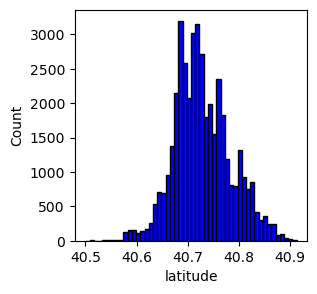

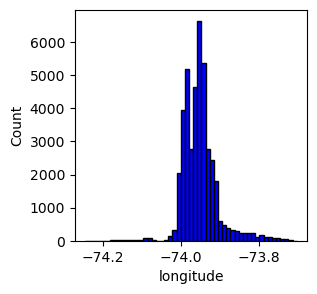

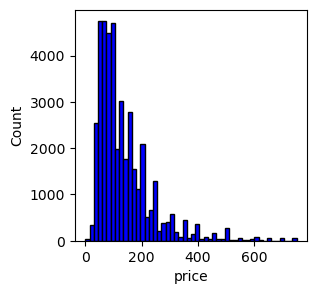

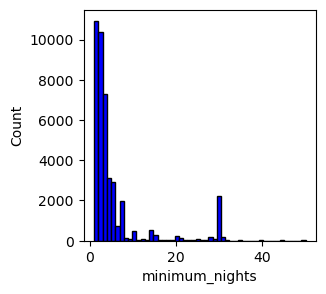

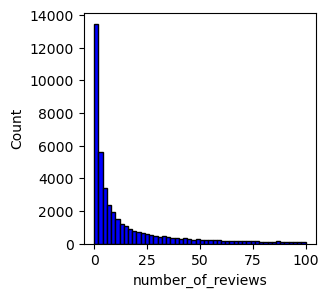

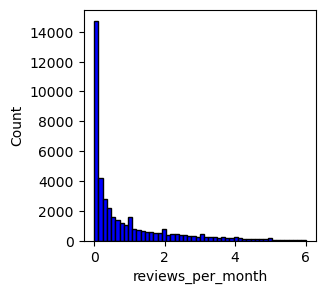

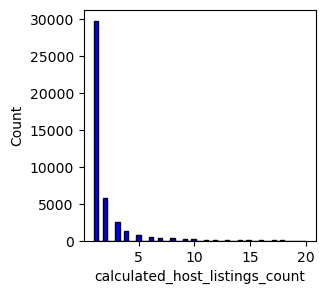

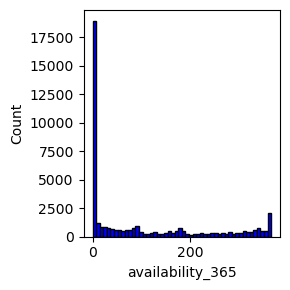

In [76]:
# Более информативно
for col in data.select_dtypes(include=['int64', 'float64']):
    diapazon = data[col].max()-data[col].min()
    binwidth = diapazon*0.02

    fig, ax = plt.subplots(figsize=(3, 3))
                    
    ax.set_xlabel(col, size = 10)
    ax.set_ylabel('Count', size= 10)
    ax.hist(data[col], bins = np.arange(data[col].min(), data[col].max() + binwidth, binwidth),
           color = 'blue', edgecolor = 'black')

plt.tight_layout()
plt.show()

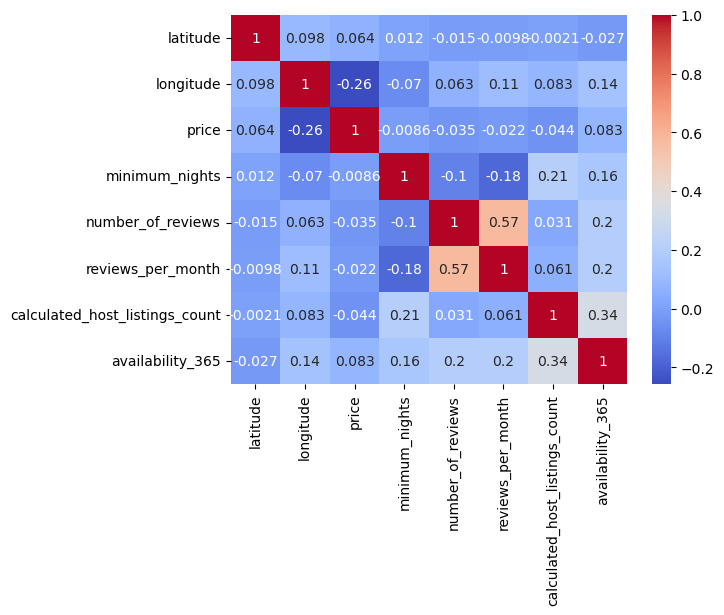

In [77]:
# Матрица попарных корреляций
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

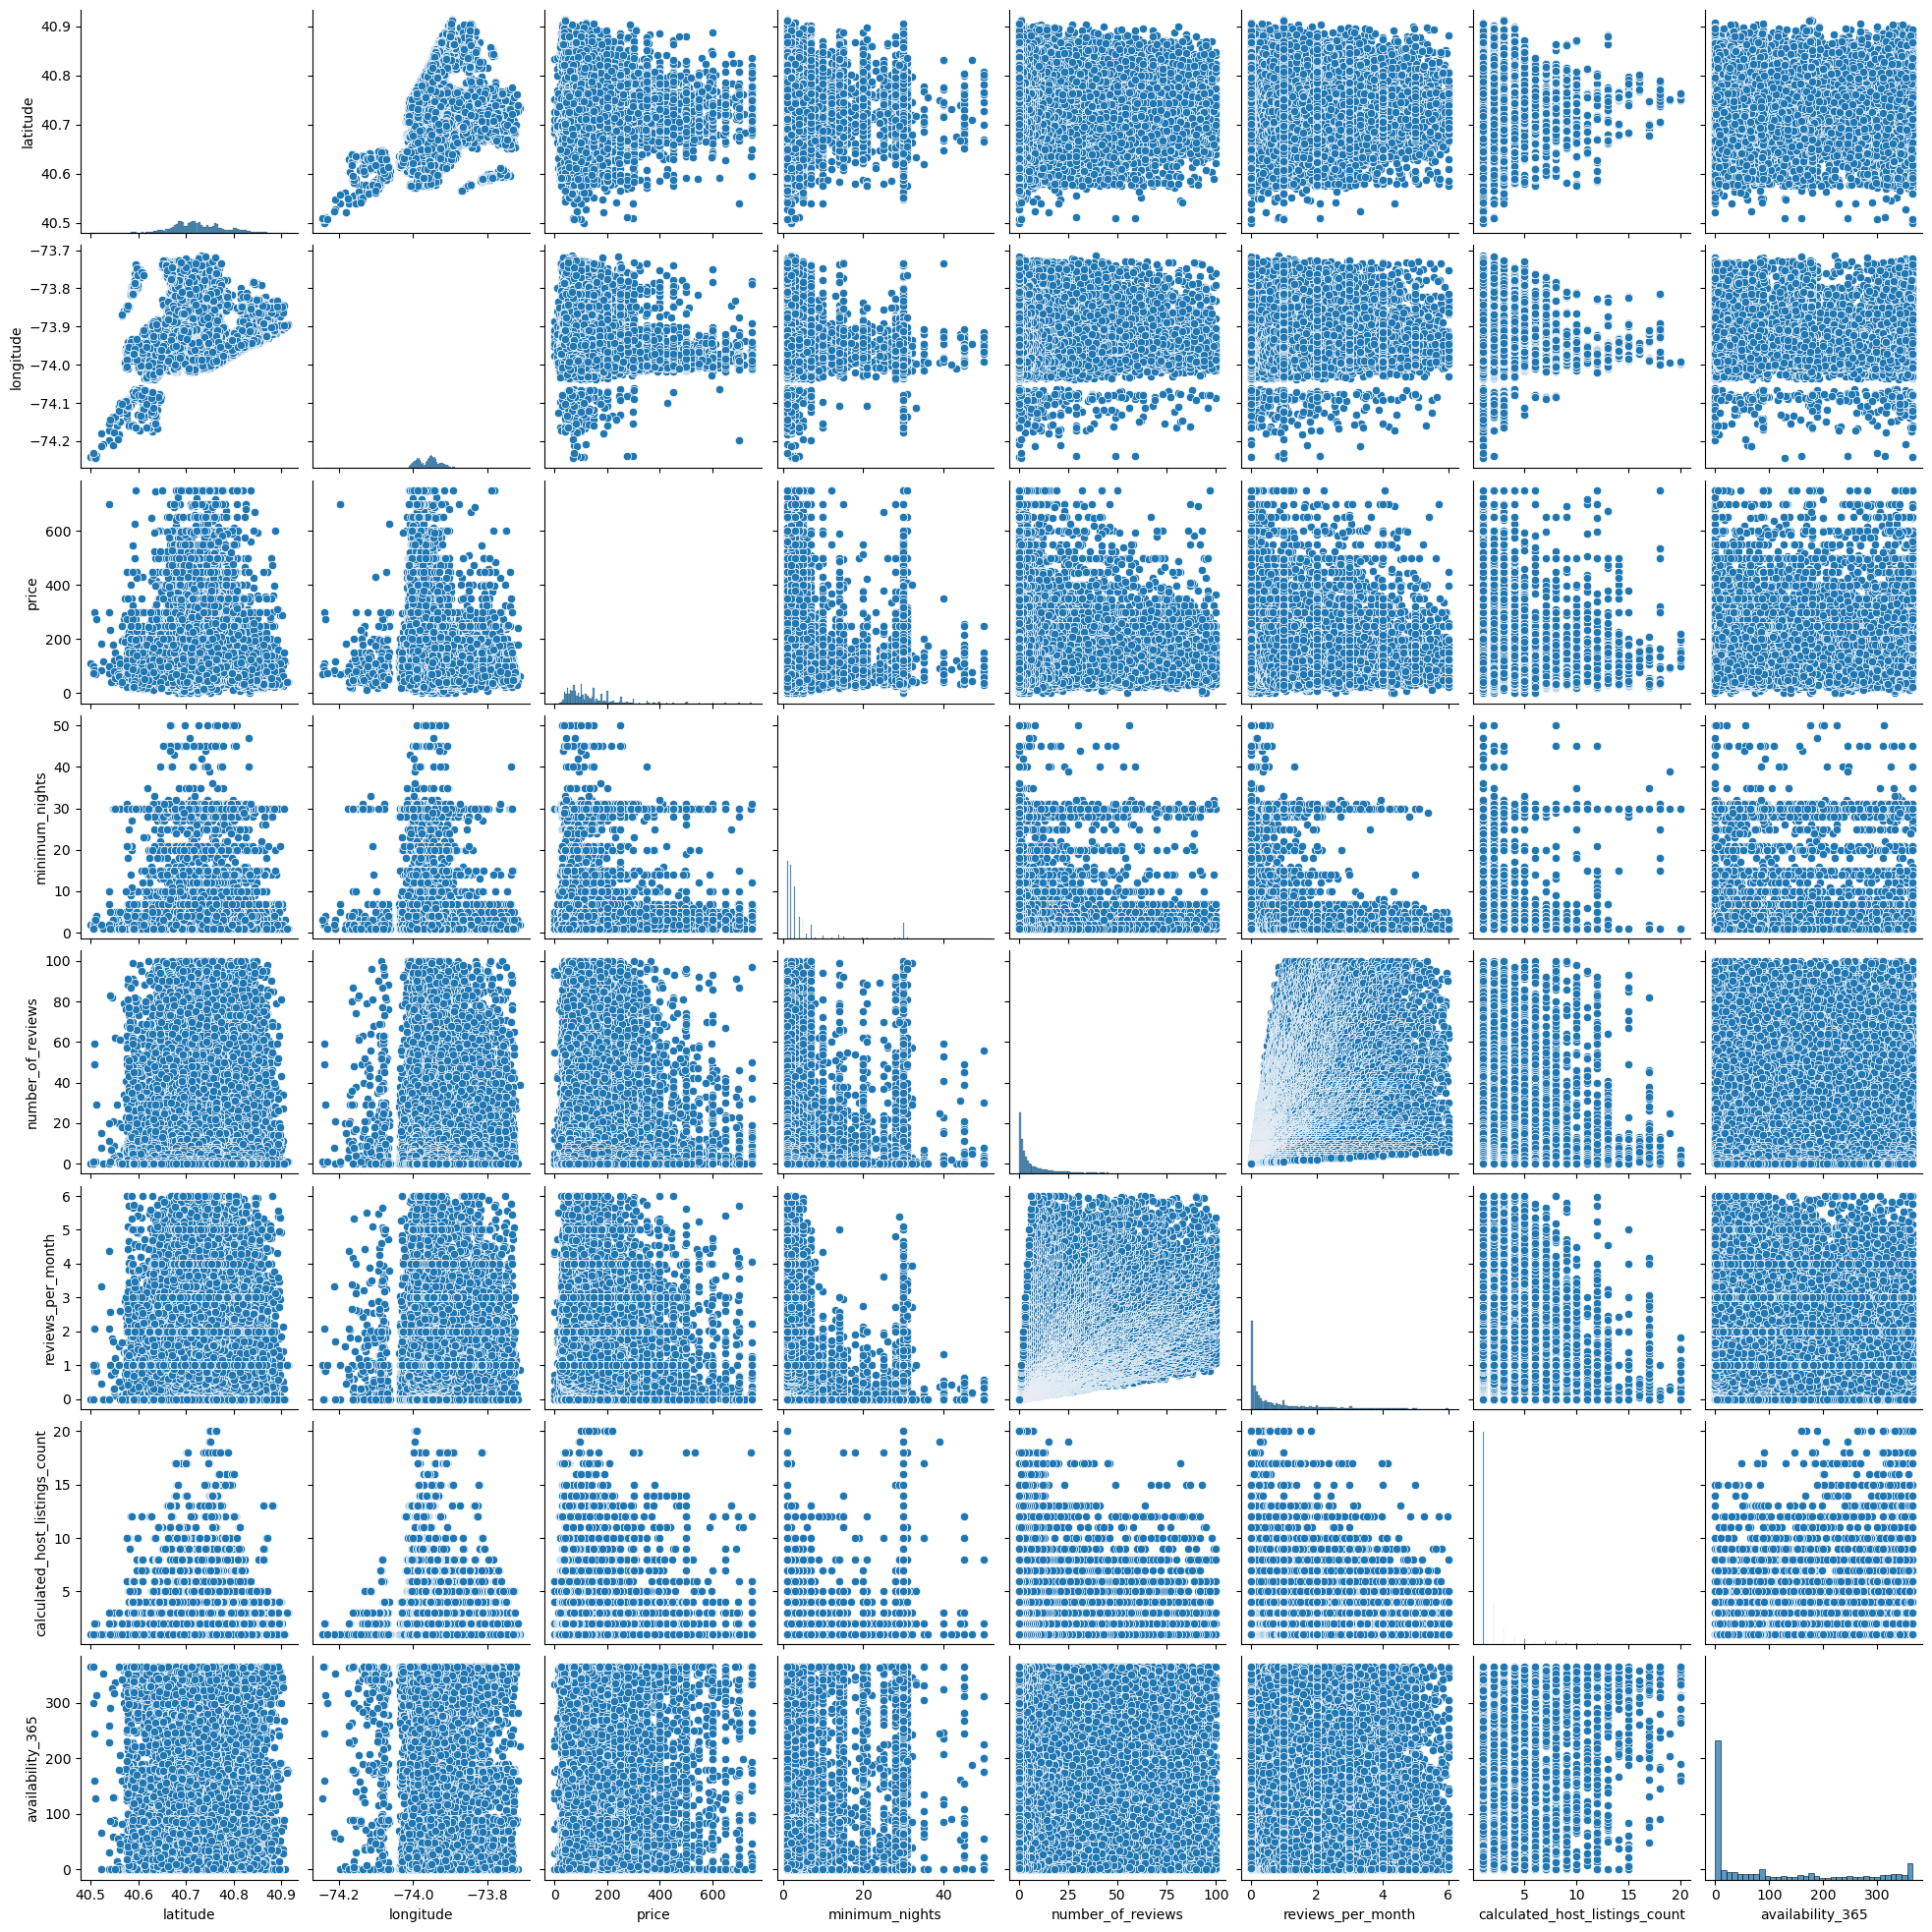

In [78]:
# Pairplot все
sns.pairplot(data)
plt.show()

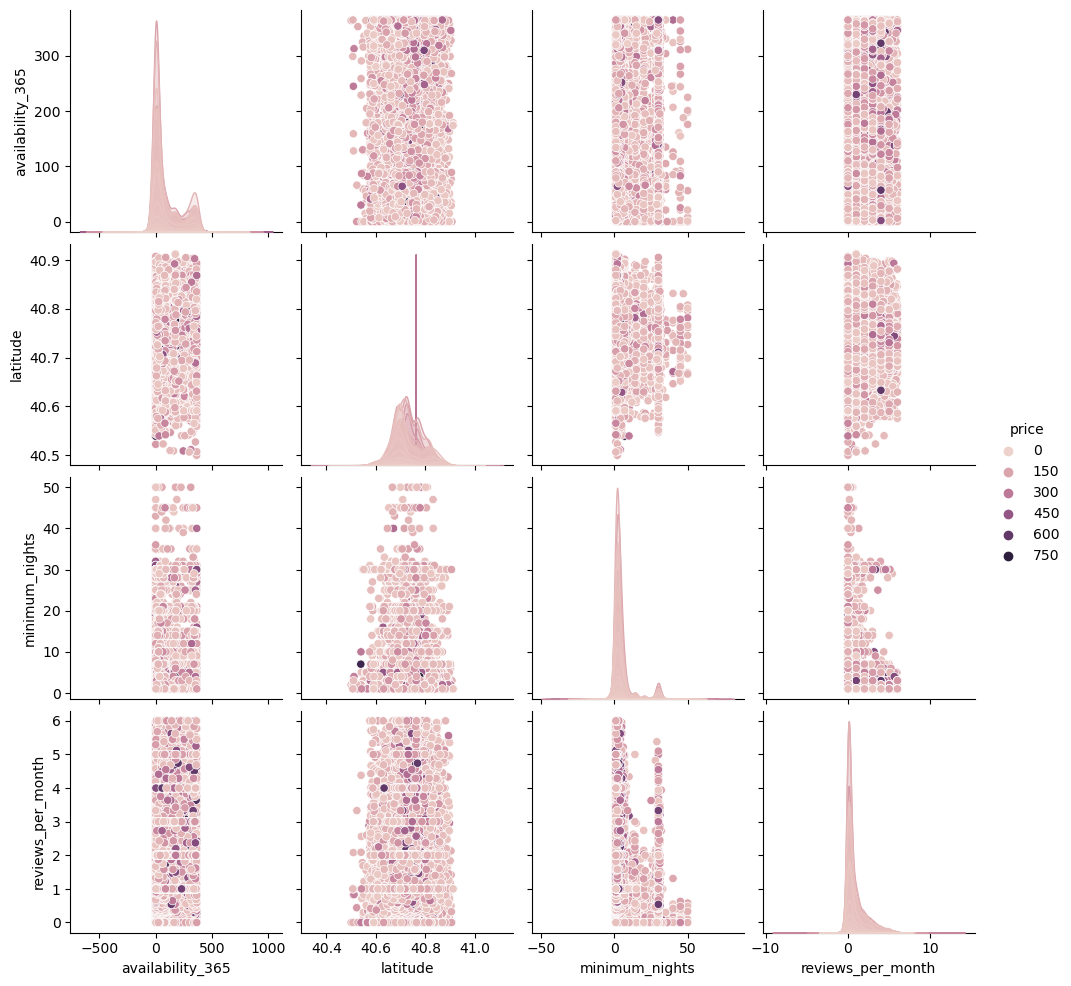

In [117]:
# Pairplot первые 5 самые значимые
corrmat = data.corr()
cols = corrmat.nlargest(5, 'price')['price'].index.tolist()
sns.pairplot(data=data[cols], hue='price')

In [81]:
# Заменяем категориальные признаки на числовые
dummy_df = pd.get_dummies(data)

In [82]:
from math import sqrt
def evklid_distance(row):
    distance = sqrt((40.752889 - row['latitude'])**2 + (-73.994194 - row['longitude'])**2)
    return distance

In [83]:
# Дообавляем Евклтдово расстояние от Манхэттана
dummy_df['evklid_distance'] = dummy_df.apply(evklid_distance, axis=1)

In [84]:
data_evklid = dummy_df.drop(columns=['latitude','longitude'], axis=1)
data_geo = dummy_df.drop(columns=['evklid_distance'], axis=1)

In [ ]:
# Используем Евклидово расстояние

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [95]:
x, y = data_evklid.drop('price', axis=1), data_evklid['price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

my_alphas = [0.01, 0.1, 0.5, 1, 10]

In [96]:
# RidgeCV
from sklearn.linear_model import RidgeCV

ridge_cv=RidgeCV(alphas=my_alphas, store_cv_values=True)
ridge_mod = ridge_cv.fit(xtrain,ytrain)
print(ridge_mod.alpha_)
print(np.mean(ridge_mod.cv_values_, axis=0))

0.5
[6074.69069033 6073.80051002 6072.73512095 6073.16049753 6076.92557045]


In [97]:
ypred = ridge_mod.predict(xtest)
score = ridge_mod.score(xtest,ytest)
mse = mean_squared_error(ytest,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse, np.sqrt(mse)))

R2:0.394, MSE:6159.77, RMSE:78.48


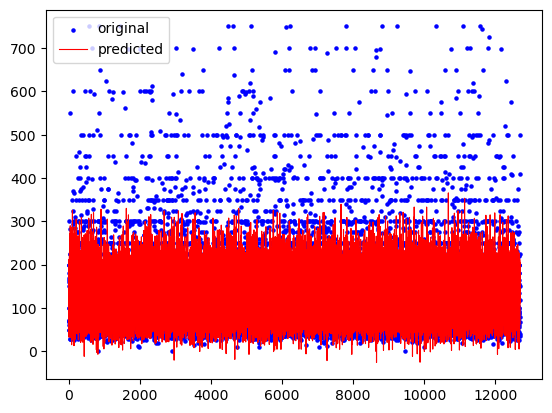

In [98]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [100]:
# LassoCV
from sklearn.linear_model import LassoCV

lassocv = LassoCV(alphas=my_alphas, cv=5).fit(x,y)
print(lassocv)
LassoCV(alphas=alphas, copy_X=True, cv=5, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False) 

LassoCV(alphas=[0.01, 0.1, 0.5, 1, 10], cv=5)


LassoCV(alphas=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10], cv=5,
        n_jobs=1, normalize=False)

In [101]:
score = lassocv.score(x,y)
ypred = lassocv.predict(xtest)
mse = mean_squared_error(ytest,ypred)
print("Alpha:{0:.2f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(lassocv.alpha_, score, mse, np.sqrt(mse)))

Alpha:0.01, R2:0.411, MSE:6121.53, RMSE:78.24


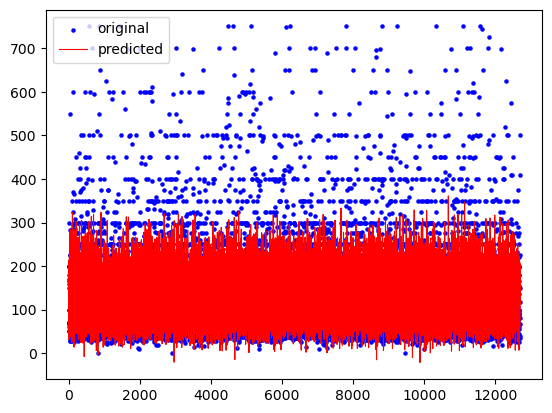

In [102]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred,lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [103]:
# ElasticNetCV
from sklearn.linear_model import ElasticNetCV

elastic_cv=ElasticNetCV(alphas=my_alphas, cv=5)
model = elastic_cv.fit(xtrain, ytrain)
print(model.alpha_)
print(model.intercept_)

0.01
96.12577334860008


In [104]:
ypred = model.predict(xtest)
score = model.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse, np.sqrt(mse)))

R2:0.386, MSE:6237.98, RMSE:78.98


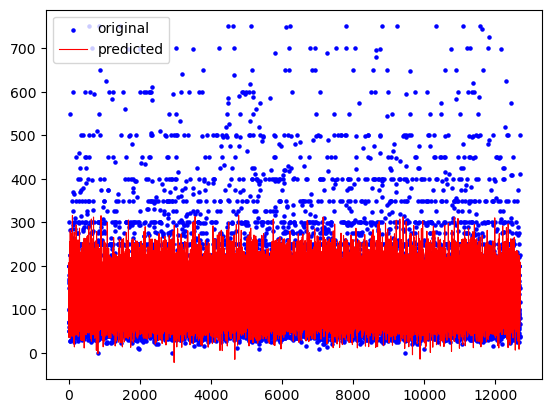

In [105]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
# LassoCV показал лучшие результаты
# R2:0.411, MSE:6121.53, RMSE:78.24

In [ ]:
# Используем координаты широты и долготы

In [106]:
x, y = data_geo.drop('price', axis=1), data_geo['price']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [107]:
# RidgeCV
from sklearn.linear_model import RidgeCV

ridge_cv=RidgeCV(alphas=my_alphas, store_cv_values=True)
ridge_mod = ridge_cv.fit(xtrain,ytrain)
print(ridge_mod.alpha_)
print(np.mean(ridge_mod.cv_values_, axis=0))

1.0
[6195.03586823 6194.15887941 6192.34279984 6191.77182468 6194.144102  ]


In [108]:
ypred = ridge_mod.predict(xtest)
score = ridge_mod.score(xtest,ytest)
mse = mean_squared_error(ytest,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse, np.sqrt(mse)))

R2:0.410, MSE:5918.12, RMSE:76.93


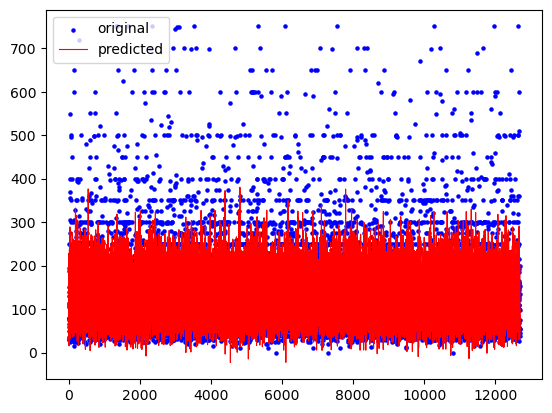

In [109]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [110]:
# LassoCV
from sklearn.linear_model import LassoCV

lassocv = LassoCV(alphas=my_alphas, cv=5).fit(x,y)
print(lassocv)
LassoCV(alphas=alphas, copy_X=True, cv=5, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False) 

LassoCV(alphas=[0.01, 0.1, 0.5, 1, 10], cv=5)


LassoCV(alphas=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10], cv=5,
        n_jobs=1, normalize=False)

In [111]:
score = lassocv.score(x,y)
ypred = lassocv.predict(xtest)
mse = mean_squared_error(ytest,ypred)
print("Alpha:{0:.2f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(lassocv.alpha_, score, mse, np.sqrt(mse)))

Alpha:0.01, R2:0.410, MSE:5850.12, RMSE:76.49


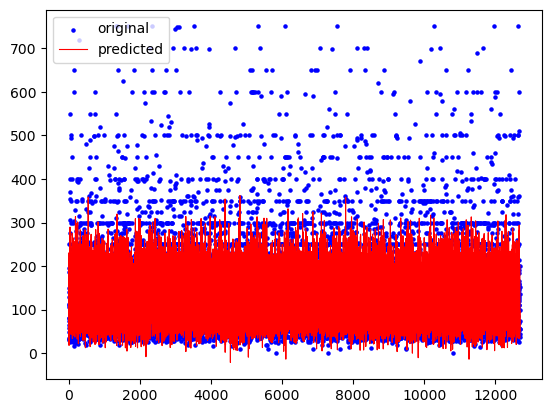

In [112]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred,lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [113]:
# ElasticNetCV
from sklearn.linear_model import ElasticNetCV

elastic_cv=ElasticNetCV(alphas=my_alphas, cv=5)
model = elastic_cv.fit(xtrain, ytrain)
print(model.alpha_)
print(model.intercept_)

0.01
-1497.9915764302857


In [114]:
ypred = model.predict(xtest)
score = model.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse, np.sqrt(mse)))

R2:0.407, MSE:5947.07, RMSE:77.12


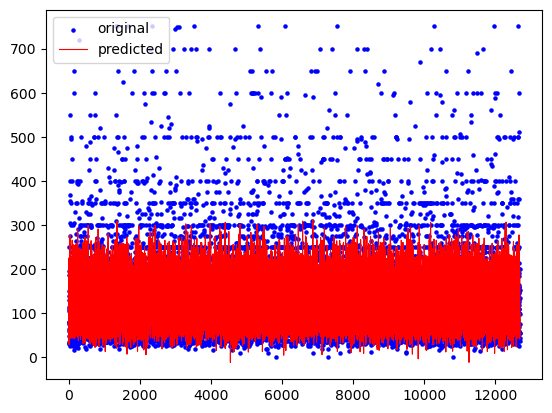

In [115]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [116]:
# В обоих случаях метод LassocCV показал лучшие результаты 
#    и более точные при обучении на данных с указанием широты и долготы - R2 почти одинаковый, а ошибки меньше

# Обучение с использование Евклидового расстояния
# RidgeCV      - R2:0.394, MSE:6159.77, RMSE:78.48
# LassoCV      - R2:0.411, MSE:6121.53, RMSE:78.24
# ElasticNetCV - R2:0.386, MSE:6237.98, RMSE:78.98

# Обучение с использованием широты и долготы
# RidgeCV      - R2:0.410, MSE:5918.12, RMSE:76.93
# LassoCV      - R2:0.410, MSE:5850.12, RMSE:76.49
# ElasticNetCV - R2:0.407, MSE:5947.07, RMSE:77.12